In [1]:
# Data Source:  https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1810000501  - CPI Data
#               https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410006401 - Wage Data

# Analysis of CPI rollup and constituents vs Wage growth in Canada


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from labellines import labelLine, labelLines

In [3]:
!ls

1810000501-noSymbol (1).csv
CPI_aggregate.csv
Canada CPI analysis.ipynb
Consumer_price_data.csv
Wages_1997_to_2019.csv


### First let's look at official CPI data, with the perscribed basket. Data is from 1970 to 2019.

In [4]:
CPI_agg = pd.read_csv('./CPI_aggregate.csv')
CPI_agg.head()


,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1970,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.2,20.3,NaN,NaN,NaN,1
1,1971,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.2,20.9,NaN,NaN,NaN,1
2,1972,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.2,21.9,NaN,NaN,NaN,1
3,1973,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.2,23.6,NaN,NaN,NaN,1
4,1974,Canada,2016A000011124,All-items,2002=100,17,units,0,v41693271,2.2,26.2,NaN,NaN,NaN,1


In [5]:
features = ['REF_DATE', "VALUE"]
CPI_agg = CPI_agg.filter(features)

In [6]:
CPI_agg = CPI_agg.rename(columns = {"REF_DATE": "Year", "VALUE": "CPI_agg"})
CPI_agg.set_index('Year')
CPI_agg.head()

,Year,CPI_agg
0,1970,20.3
1,1971,20.9
2,1972,21.9
3,1973,23.6
4,1974,26.2


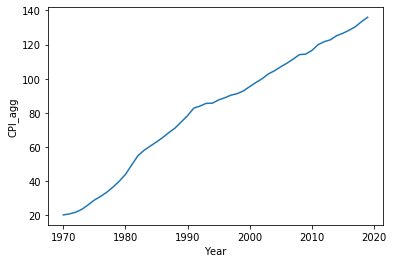

In [7]:
ax = sns.lineplot(x = 'Year', y = "CPI_agg", data = CPI_agg)

In [8]:
!ls

1810000501-noSymbol (1).csv
CPI_aggregate.csv
Canada CPI analysis.ipynb
Consumer_price_data.csv
Wages_1997_to_2019.csv


### Now lets examine wages

In [9]:
Wage_data = pd.read_csv('./Wages_1997_to_2019.csv')
Wage_data.tail()

,REF_DATE,GEO,DGUID,Wages,Type of work,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
41,2015,Canada,2016A000011124,Median weekly wage rate,Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Current dollars,75,units,0,v2196618,1.5.1.1.1.1,807.60,NaN,NaN,NaN,2
42,2016,Canada,2016A000011124,Median weekly wage rate,Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Current dollars,75,units,0,v2196618,1.5.1.1.1.1,820.40,NaN,NaN,NaN,2
43,2017,Canada,2016A000011124,Median weekly wage rate,Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Current dollars,75,units,0,v2196618,1.5.1.1.1.1,840.00,NaN,NaN,NaN,2
44,2018,Canada,2016A000011124,Median weekly wage rate,Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Current dollars,75,units,0,v2196618,1.5.1.1.1.1,865.26,NaN,NaN,NaN,2
45,2019,Canada,2016A000011124,Median weekly wage rate,Both full- and part-time employees,"Total employees, all industries",Both sexes,15 years and over,Current dollars,75,units,0,v2196618,1.5.1.1.1.1,900.00,NaN,NaN,NaN,2


Note: Wage data only available online from 1997 onward. Prior data would have to be manually entered

There are both median and average wages available. Let's start by comparing Median vs Average wage growth. Median is the middle wage, with 50% earning above and 50% below. Average is the sum of all wages divided by the total earners.

In [10]:
features = ['REF_DATE', "Wages", 'VALUE']
Wage_data = Wage_data.filter(features)
Wage_data = Wage_data.rename(columns = {"REF_DATE": "Year"}) 
Wage_data.set_index('Year')
Wage_data.head()

,Year,Wages,VALUE
0,1997,Average weekly wage rate,573.47
1,1998,Average weekly wage rate,581.68
2,1999,Average weekly wage rate,597.14
3,2000,Average weekly wage rate,616.00
4,2001,Average weekly wage rate,635.65


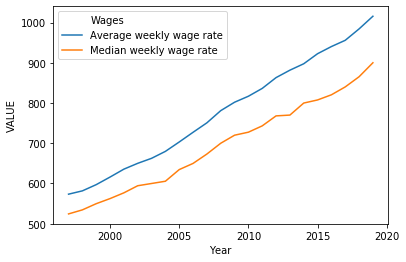

In [11]:
ax = sns.lineplot(x = 'Year', y = "VALUE", hue = 'Wages', data = Wage_data)

In [12]:
Max_median = Wage_data['VALUE'].where(Wage_data['Wages']=='Median weekly wage rate').max()
Min_median = Wage_data['VALUE'].where(Wage_data['Wages']=='Median weekly wage rate').min()

Max_avg = Wage_data['VALUE'].where(Wage_data['Wages']=='Average weekly wage rate').max()
Min_avg = Wage_data['VALUE'].where(Wage_data['Wages']=='Average weekly wage rate').min()

Median_growth = round((Max_median - Min_median)/Min_median * 100, 2)
Avg_growth = round((Max_avg - Min_avg)/Min_avg * 100, 2)

In [13]:
row_template = '{:^15} | {:^20} | {:^20}'

In [14]:
print(row_template.format('', 'Median', 'Avg'))
print('*'*60)
print(row_template.format('Min', Min_median, Min_avg))
print(row_template.format('Max', Max_median, Max_avg))
print(row_template.format('Growth %', Median_growth, Avg_growth))

                |        Median        |         Avg         
************************************************************
      Min       |        524.4         |        573.47       
      Max       |        900.0         |        1015.6       
   Growth %     |        71.62         |         77.1        


Average and Median wages have grown, with average wages increasing slightly faster. For further analysis, Median wages will be used as they best represent the most normative wage earners experience.

In [15]:
Median_wage_data = Wage_data[Wage_data['Wages'] == 'Median weekly wage rate']
Median_wage_data = Median_wage_data.rename(columns = {'VALUE': 'Median weekly wage'})
Median_wage_data = Median_wage_data.drop(columns = ['Wages'])
Median_wage_data = Median_wage_data.set_index('Year')
Median_wage_data

,Median weekly wage
Year,
1997,524.40
1998,534.45
1999,549.81
2000,562.50
2001,576.80
2002,594.42
2003,600.00
2004,605.60
2005,634.55


Need to scale these wages, with respect to 1997 = 100

In [16]:
Median_wage_data = (Median_wage_data/Median_wage_data.min()) *100
    
Median_wage_data

,Median weekly wage
Year,
1997,100.000000
1998,101.916476
1999,104.845538
2000,107.265446
2001,109.992372
2002,113.352403
2003,114.416476
2004,115.484363
2005,121.004958


In [17]:
900/524.40

1.7162471395881007

### Let's look at CPI data, broken down into individual elements

In [18]:
CPI_gran = pd.read_csv('./Consumer_price_data.csv')
CPI_gran.tail()


,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
876,2015,Canada,2016A000011124,Tobacco products and smokers' supplies,2002=100,17,units,0,v41693514,2.266,187.0,NaN,NaN,NaN,1
877,2016,Canada,2016A000011124,Tobacco products and smokers' supplies,2002=100,17,units,0,v41693514,2.266,196.8,NaN,NaN,NaN,1
878,2017,Canada,2016A000011124,Tobacco products and smokers' supplies,2002=100,17,units,0,v41693514,2.266,206.2,NaN,NaN,NaN,1
879,2018,Canada,2016A000011124,Tobacco products and smokers' supplies,2002=100,17,units,0,v41693514,2.266,222.9,NaN,NaN,NaN,1
880,2019,Canada,2016A000011124,Tobacco products and smokers' supplies,2002=100,17,units,0,v41693514,2.266,232.3,NaN,NaN,NaN,1


In [19]:
features = ['REF_DATE', "Products and product groups", 'VALUE']
CPI_gran = CPI_gran.filter(features)
CPI_gran = CPI_gran.rename(columns = {"REF_DATE": "Year"}) 

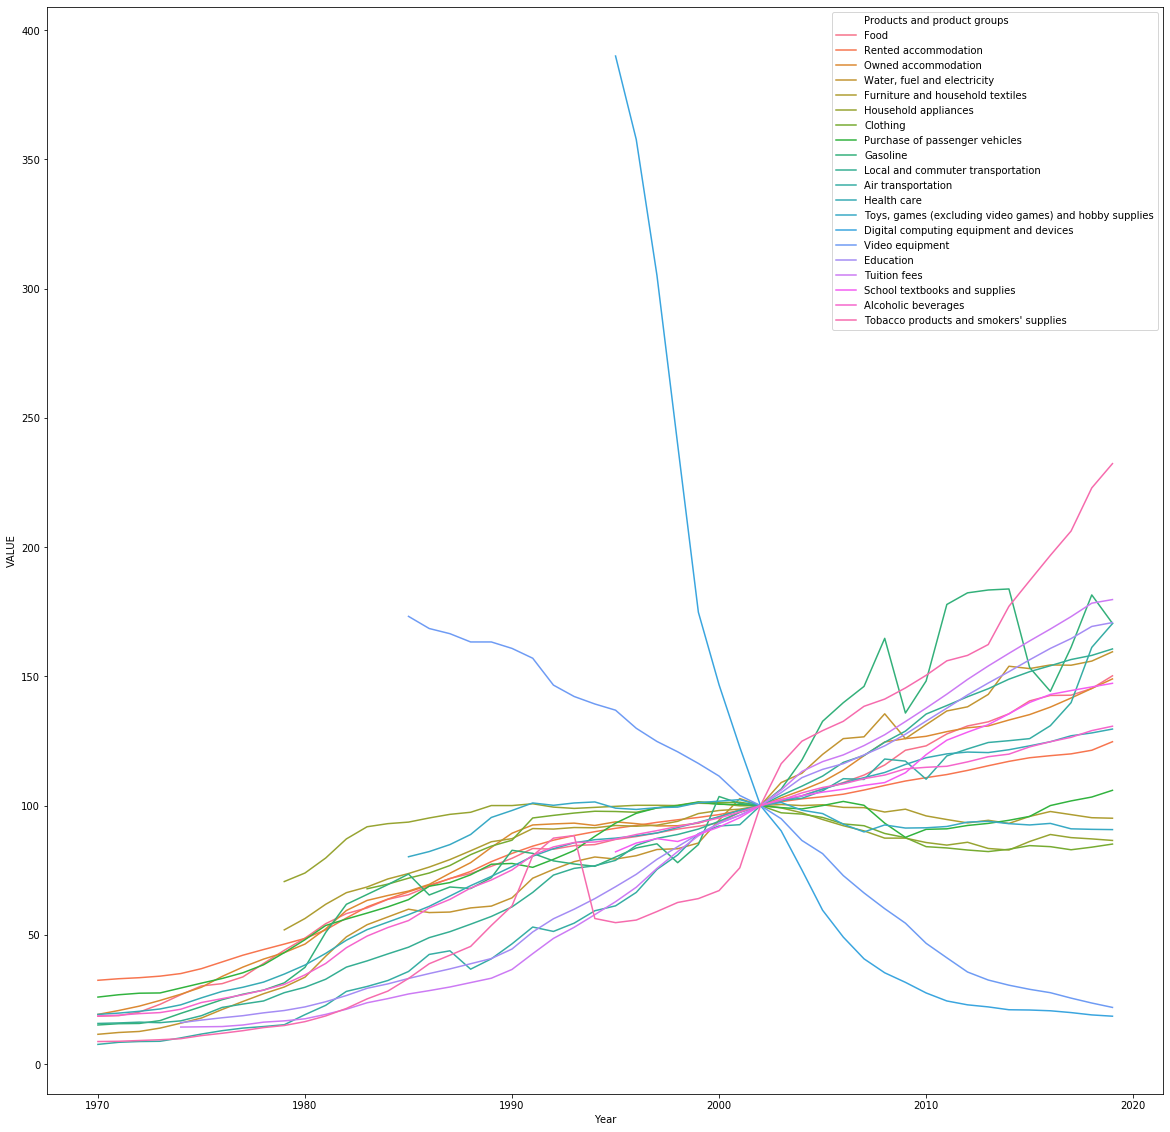

In [20]:
plt.figure(figsize = (20,20))
ax = sns.lineplot(x = 'Year', y = "VALUE", hue = 'Products and product groups', data = CPI_gran)

Year 2002 is taken as an index = 100 here. We will need to rescale the data to an index of 1997 = 100 since that is when our wages information starts.

In [21]:
CPI_agg = CPI_agg[CPI_agg.Year >= 1997]
CPI_agg = CPI_agg.rename(columns = {"CPI_agg": "VALUE"})
CPI_agg.insert(0, "Products and product groups", "CPI official")
CPI_agg.head()

,Products and product groups,Year,VALUE
27,CPI official,1997,90.4
28,CPI official,1998,91.3
29,CPI official,1999,92.9
30,CPI official,2000,95.4
31,CPI official,2001,97.8


In [22]:
CPI_gran.shape

(881, 3)

In [23]:
#Take out data prior to 1997
CPI_gran_trimmed = CPI_gran[CPI_gran.Year >= 1997]

In [24]:
Wage_data_reformat = Median_wage_data
Wage_data_reformat = Wage_data_reformat.rename(columns = {'Median weekly wage': 'VALUE'})
Wage_data_reformat.insert(0, "Products and product groups", "Median weekly wage")
Wage_data_reformat.head()
Wage_data_reformat = Wage_data_reformat.reset_index()
Wage_data_reformat.head()

,Year,Products and product groups,VALUE
0,1997,Median weekly wage,100.000000
1,1998,Median weekly wage,101.916476
2,1999,Median weekly wage,104.845538
3,2000,Median weekly wage,107.265446
4,2001,Median weekly wage,109.992372


In [25]:
CPI_gran_trimmed = CPI_gran_trimmed.append(Wage_data_reformat, ignore_index = True, sort=True)
CPI_gran_trimmed = CPI_gran_trimmed.append(CPI_agg, ignore_index = True, sort=True)

In [26]:
features = CPI_gran_trimmed['Products and product groups'].unique()
features

array(['Food', 'Rented accommodation', 'Owned accommodation',
       'Water, fuel and electricity', 'Furniture and household textiles',
       'Household appliances', 'Clothing',
       'Purchase of passenger vehicles', 'Gasoline',
       'Local and commuter transportation', 'Air transportation',
       'Health care',
       'Toys, games (excluding video games) and hobby supplies',
       'Digital computing equipment and devices', 'Video equipment',
       'Education', 'Tuition fees', 'School textbooks and supplies',
       'Alcoholic beverages', "Tobacco products and smokers' supplies",
       'Median weekly wage', 'CPI official'], dtype=object)

In [27]:
Vals_1997 = CPI_gran_trimmed[CPI_gran_trimmed['Year'] == 1997]
Vals_1997['VALUE'] = Vals_1997['VALUE'].astype(float)
Vals_1997

C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Products and product groups,VALUE,Year
0,Food,89.4,1997
23,Rented accommodation,93.5,1997
46,Owned accommodation,92.1,1997
69,"Water, fuel and electricity",83.0,1997
92,Furniture and household textiles,92.4,1997
115,Household appliances,100.1,1997
138,Clothing,99.1,1997
161,Purchase of passenger vehicles,99.1,1997
184,Gasoline,85.2,1997
207,Local and commuter transportation,87.3,1997


We will need to correct all the values to index 1997 as 100.0.

In [28]:
Vals_1997['Correction'] = 100 - Vals_1997['VALUE']

Vals_1997

C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Products and product groups,VALUE,Year,Correction
0,Food,89.4,1997,10.6
23,Rented accommodation,93.5,1997,6.5
46,Owned accommodation,92.1,1997,7.9
69,"Water, fuel and electricity",83.0,1997,17.0
92,Furniture and household textiles,92.4,1997,7.6
115,Household appliances,100.1,1997,-0.1
138,Clothing,99.1,1997,0.9
161,Purchase of passenger vehicles,99.1,1997,0.9
184,Gasoline,85.2,1997,14.8
207,Local and commuter transportation,87.3,1997,12.7


In [29]:
correction_to_1997 = pd.Series(Vals_1997.Correction.values, index = Vals_1997['Products and product groups']).to_dict()

In [30]:
correction_to_1997

{'Food': 10.599999999999994,
 'Rented accommodation': 6.5,
 'Owned accommodation': 7.900000000000006,
 'Water, fuel and electricity': 17.0,
 'Furniture and household textiles': 7.599999999999994,
 'Household appliances': -0.09999999999999432,
 'Clothing': 0.9000000000000057,
 'Purchase of passenger vehicles': 0.9000000000000057,
 'Gasoline': 14.799999999999997,
 'Local and commuter transportation': 12.700000000000003,
 'Air transportation': 24.700000000000003,
 'Health care': 10.599999999999994,
 'Toys, games (excluding video games) and hobby supplies': 0.7999999999999972,
 'Digital computing equipment and devices': -205.10000000000002,
 'Video equipment': -24.799999999999997,
 'Education': 20.799999999999997,
 'Tuition fees': 24.299999999999997,
 'School textbooks and supplies': 12.799999999999997,
 'Alcoholic beverages': 9.700000000000003,
 "Tobacco products and smokers' supplies": 41.0,
 'Median weekly wage': 0.0,
 'CPI official': 9.599999999999994}

In [31]:
corrected_vals_1997 = CPI_gran_trimmed.copy(deep = True)

In [32]:
for index_label, row_series in corrected_vals_1997.iterrows():
    product = corrected_vals_1997.at[index_label, 'Products and product groups']
    correction = correction_to_1997[product]
    corrected_vals_1997.at[index_label, 'VALUE'] = correction + row_series['VALUE']

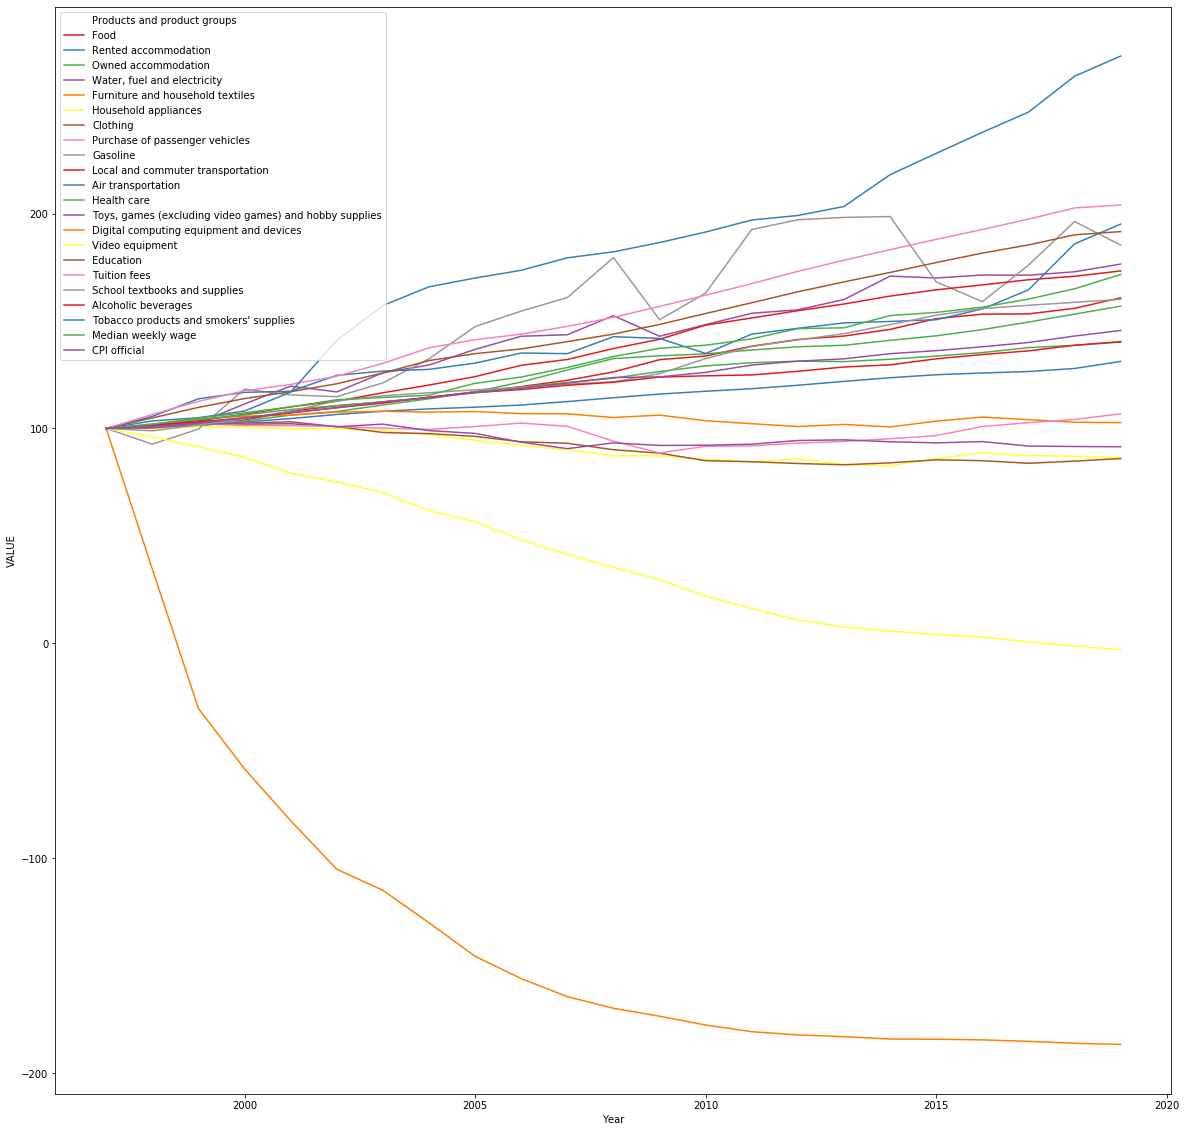

In [33]:
plt.figure(figsize = (20,20))
ax = sns.lineplot(x = 'Year', y = "VALUE", hue = 'Products and product groups', data = corrected_vals_1997, palette = "Set1")

In [34]:
corrected_vals_1997

,Products and product groups,VALUE,Year
0,Food,100.0,1997
1,Food,101.5,1998
2,Food,102.6,1999
3,Food,103.9,2000
4,Food,108.0,2001
...,...,...,...
501,CPI official,136.2,2015
502,CPI official,138.0,2016
503,CPI official,140.0,2017
504,CPI official,143.0,2018


In [35]:
untidy_corrected = corrected_vals_1997.pivot_table(index = "Year", values ="VALUE", columns = "Products and product groups")
untidy_corrected.reset_index(drop = False, inplace=True)
untidy_corrected.columns.name = None

In [36]:
untidy_corrected.tail()

,Year,Air transportation,Alcoholic beverages,CPI official,Clothing,Digital computing equipment and devices,Education,Food,Furniture and household textiles,Gasoline,...,Median weekly wage,Owned accommodation,Purchase of passenger vehicles,Rented accommodation,School textbooks and supplies,Tobacco products and smokers' supplies,"Toys, games (excluding video games) and hobby supplies",Tuition fees,Video equipment,"Water, fuel and electricity"
18,2015,150.6,132.4,136.2,85.4,-184.2,177.2,151.1,103.4,168.2,...,154.004577,143.1,96.7,125.0,152.7,228.0,93.3,188.0,4.1,170.0
19,2016,155.6,134.4,138.0,85.0,-184.5,181.6,153.2,105.3,159.0,...,156.445461,146.0,100.9,125.8,155.8,237.8,93.9,192.6,2.8,171.4
20,2017,164.5,136.1,140.0,83.8,-185.2,185.4,153.3,104.1,176.0,...,160.183066,149.5,102.7,126.5,157.3,247.2,91.8,197.4,0.7,171.3
21,2018,185.9,138.7,143.0,84.8,-186.1,190.1,155.9,102.9,196.3,...,165.000000,153.2,104.2,127.9,158.7,263.9,91.6,202.6,-1.2,172.9
22,2019,195.1,140.4,145.6,86.0,-186.6,191.6,160.8,102.7,185.3,...,171.624714,156.9,106.8,131.2,160.1,273.3,91.5,204.0,-2.9,176.5


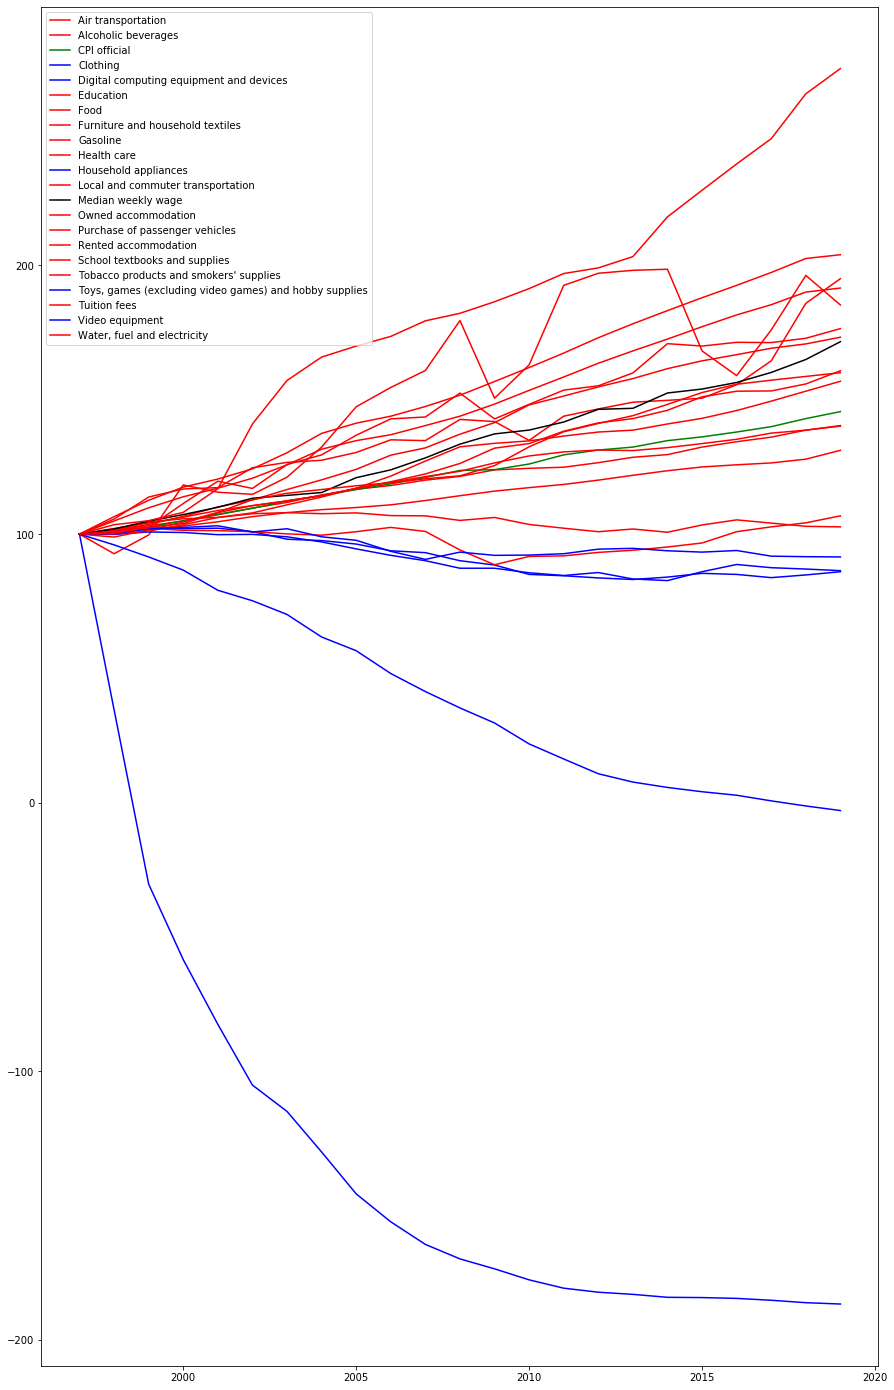

In [37]:
fig, ax = plt.subplots(figsize = (15,25))

for col in untidy_corrected.columns:    
    if col != "Year":
        if col == "Median weekly wage":
            col_code = 'k'
        elif col == "CPI official":
            col_code = 'g'
        elif untidy_corrected[col].iloc[-1] > 100:
            col_code = 'r'
        else:
            col_code = 'b'
        
        ax.plot(untidy_corrected['Year'], untidy_corrected[col], col_code, label = str(col))
        
#labelLines(plt.gca().get_lines())

plt.legend()
plt.show()

In [38]:
corrected_vals_1997

,Products and product groups,VALUE,Year
0,Food,100.0,1997
1,Food,101.5,1998
2,Food,102.6,1999
3,Food,103.9,2000
4,Food,108.0,2001
...,...,...,...
501,CPI official,136.2,2015
502,CPI official,138.0,2016
503,CPI official,140.0,2017
504,CPI official,143.0,2018


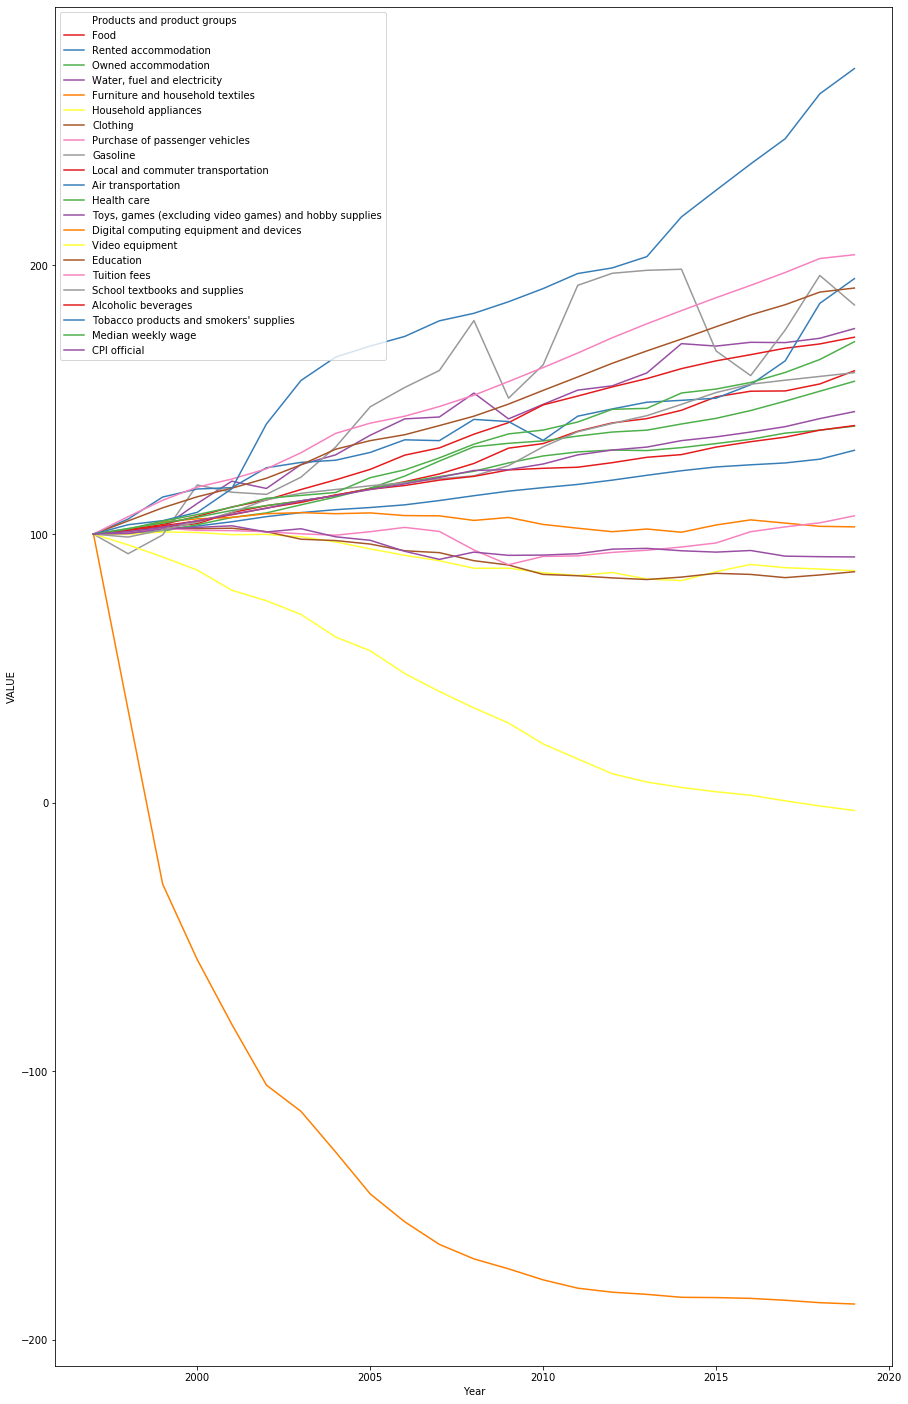

In [39]:
plt.figure(figsize = (15, 25))
ax = sns.lineplot(x = 'Year', y = "VALUE", hue = 'Products and product groups', 
                  data = corrected_vals_1997, palette = "Set1")

There is too much data here to be meaningful. Let's group these into essential and non_essential subsets for comparison.

In [40]:
untidy_corrected.columns

Index(['Year', 'Air transportation', 'Alcoholic beverages', 'CPI official',
       'Clothing', 'Digital computing equipment and devices', 'Education',
       'Food', 'Furniture and household textiles', 'Gasoline', 'Health care',
       'Household appliances', 'Local and commuter transportation',
       'Median weekly wage', 'Owned accommodation',
       'Purchase of passenger vehicles', 'Rented accommodation',
       'School textbooks and supplies',
       'Tobacco products and smokers' supplies',
       'Toys, games (excluding video games) and hobby supplies',
       'Tuition fees', 'Video equipment', 'Water, fuel and electricity'],
      dtype='object')

In [94]:
essential_features = ['Education', 'Clothing', 'Food', 'Health care', 'Local and commuter transportation',
                     'Owned accommodation', 'Rented accommodation', 'Tuition fees', 'School textbooks and supplies',
                     'Water, fuel and electricity']

non_essential_features = ['Air transportation', 'Alcoholic beverages', 
       'Digital computing equipment and devices', 'Furniture and household textiles', 'Gasoline',
       'Household appliances', 'Purchase of passenger vehicles', 
       "Tobacco products and smokers' supplies",
       'Toys, games (excluding video games) and hobby supplies',
       'Video equipment']

indices = ['CPI official']

wages =  ['Median weekly wage']


In [95]:
essential = []
for row in corrected_vals_1997['Products and product groups']:
    if row in essential_features:
        essential.append('Essential')
    elif row in non_essential_features:
        essential.append('Non essential')
    elif row in wages:
        essential.append('Wages')
    else:
        essential.append('CPI Index')  

corrected_vals_1997['Indicator'] = essential

In [96]:
corrected_vals_1997

,Products and product groups,VALUE,Year,Indicator
0,Food,100.0,1997,Essential
1,Food,101.5,1998,Essential
2,Food,102.6,1999,Essential
3,Food,103.9,2000,Essential
4,Food,108.0,2001,Essential
...,...,...,...,...
501,CPI official,136.2,2015,CPI Index
502,CPI official,138.0,2016,CPI Index
503,CPI official,140.0,2017,CPI Index
504,CPI official,143.0,2018,CPI Index


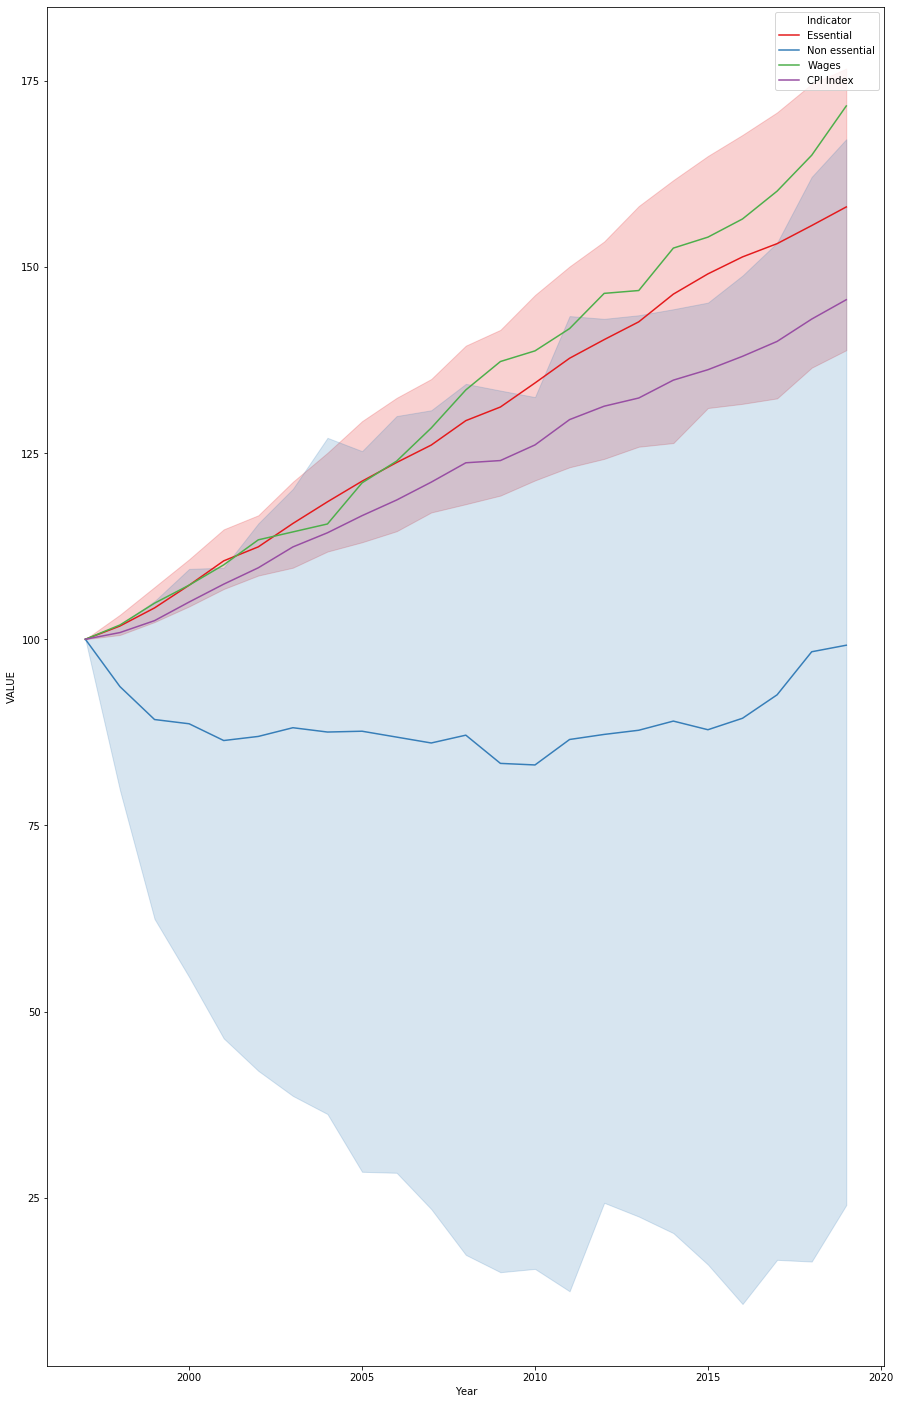

In [97]:
plt.figure(figsize = (15, 25))
ax = sns.lineplot(x = 'Year', y = "VALUE", hue = 'Indicator', 
                  data = corrected_vals_1997, palette = "Set1")

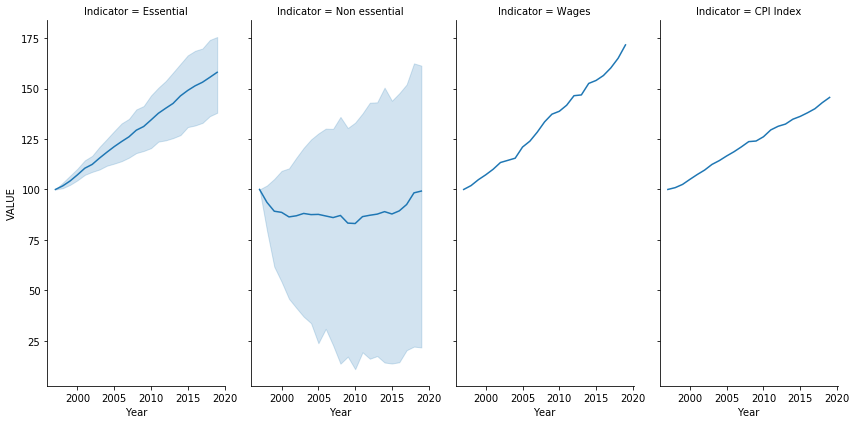

In [98]:
g = sns.FacetGrid(corrected_vals_1997, col = 'Indicator',
                 height = 6, aspect = .5)
g.map(sns.lineplot, 'Year', "VALUE")


In [99]:
final_prices = corrected_vals_1997[corrected_vals_1997['Year'] == 2019]
final_prices['VALUE'] = final_prices['VALUE'].astype(int)
final_prices = final_prices.sort_values(by=['VALUE'], ascending = False)
final_prices = final_prices.rename(columns = {'VALUE': '2019 Value (index 1997=100)'})
final_prices = final_prices.drop(columns = 'Year')
final_prices = final_prices.reset_index(drop = True)

final_prices

C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Products and product groups,2019 Value (index 1997=100),Indicator
0,Tobacco products and smokers' supplies,273,Non essential
1,Tuition fees,204,Essential
2,Air transportation,195,Non essential
3,Education,191,Essential
4,Gasoline,185,Non essential
5,"Water, fuel and electricity",176,Essential
6,Local and commuter transportation,173,Essential
7,Median weekly wage,171,Wages
8,Food,160,Essential
9,School textbooks and supplies,160,Essential


In [100]:
from tabulate import tabulate

In [101]:
print(tabulate(final_prices, 
               headers = ['Product and product groups', '2019 Value \n(Index: 1997 = 100)', 'Category'], 
               showindex = False))

Product and product groups                                        2019 Value   Category
                                                          (Index: 1997 = 100)
------------------------------------------------------  ---------------------  -------------
Tobacco products and smokers' supplies                                    273  Non essential
Tuition fees                                                              204  Essential
Air transportation                                                        195  Non essential
Education                                                                 191  Essential
Gasoline                                                                  185  Non essential
Water, fuel and electricity                                               176  Essential
Local and commuter transportation                                         173  Essential
Median weekly wage                                                        171  Wages
Food                 

Overall, increase in cost of essential and non essentials has been lower than that of median average wages. The official CPI has seen an incerase in 145% while wages growed 171% over the same period.

Some specific categories have outstripped wage growth: Education and education related expenses, utility bills, gasoline (one $/L basis, does not account for higher incremental fuel efficiency), and tobacco products.

It is not clear from the data how the cost of housing is calculated. In the case of rent, there is a clear direct cost, however the cost of purchased housing is unclear as to the impact of purchase price vs mortgage vs carrying costs. As well, there is no differention across specific geographies in the data available.

Overall the conclusion can be that other than for some specific categories, consumer prices for essential and non-essential goods have increased at a slower rate than median weekly wages, implying a higher effective purchasing power for consumers from 1997 to 2019.